In [ ]:
#pip install shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.externals import joblib

# Connect to Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288597,80,590930,2,0,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288598,80,1187988,2,0,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288599,80,10,1,9,6,54,6,6,6.0,0.0,...,20,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288600,138,19,10,0,2370,0,237,237,237.0,0.0,...,20,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN


# Data Exploration

In [ ]:
df.size

22799558

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [ ]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
288597,80,590930,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
288598,80,1187988,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
288599,80,10,1,9,6,54,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
288600,138,19,10,0,2370,0,237,237,237.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
288601,80,4751966,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(288602, 79)

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
# Identifing the data types
data_types = df.dtypes

# Separate into qualitative (categorical) and quantitative (numeric) values
qualitative_features = data_types[data_types == 'object'].index
quantitative_features = data_types[data_types != 'object'].index

#Output
print("Qualitative (Categorical) Features:")
qualitative_features
print()
print("Quantitative (Numeric) Features:")
quantitative_features

Qualitative (Categorical) Features:

Quantitative (Numeric) Features:


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

# Sample the Dataset

In [ ]:
df = df.sample(600)
#df.to_csv("/content/drive/MyDrive/sample_data.csv", index=False)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
121010,443,5386250,7,4,599,141,517,0,85.571429,191.308527,...,32,100420.00000,0.00000,100420,100420,5285826.0,0.000000e+00,5285826,5285826,BENIGN
242399,445,112737535,184,176,40632,51562,3086,0,220.826087,383.109869,...,20,25151.60000,35293.67478,74279,51,22500000.0,1.020000e+07,30000000,10600000,BENIGN
185217,2800,50,2,2,4,12,2,2,2.000000,0.000000,...,24,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
80474,2049,4,2,0,4,0,2,2,2.000000,0.000000,...,24,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
75265,53,509,1,1,42,114,42,42,42.000000,0.000000,...,20,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54585,443,21016380,31,49,1445,64885,810,0,46.612903,169.760945,...,32,88655.50000,100935.95750,160028,17283,9993371.0,4.720079e+04,10000000,9959995,BENIGN
13640,80,115499213,16,16,1351,2860,1267,0,84.437500,315.353552,...,20,69133.72727,28819.99243,155920,59760,10000000.0,3.651427e+03,10000000,9999567,BENIGN
144168,49586,4,2,0,0,0,0,0,0.000000,0.000000,...,32,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
163613,1079,44,2,2,4,12,2,2,2.000000,0.000000,...,24,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN


# Copy Data

In [ ]:
df.copy = df.copy()

# Data Cleaning

In [ ]:
# Handle missing values
df.fillna(0, inplace=True)
df.shape

(600, 79)

In [ ]:
# Convert categorical labels to numbered labels
#df['Label'] = df['Label'].astype('category').cat.codes

In [ ]:
if 'Label' not in df.columns:
    print("Column 'Label' not found. Available columns include: ", df.columns)
else:
    df.fillna(0, inplace=True)
    df['Label'] = LabelEncoder().fit_transform(df['Label'])

# df['address'] = label_encoder.fit_transform(df['address'])

# convert address to numeric using hashing ( more scalable option)
#df['address'] = df['address'].apply(lambda x: hash(x) % (10 ** 8))

**OneHotEncoder**

In [ ]:
# Encoding qualitative values
ohe = OneHotEncoder(sparse=False, drop='first') # avoid multicollinearity by dropping first column
# Object type columns seleted
object_columns = df.select_dtypes(include=['object']).columns
# Fit and transform
encoded_cols = pd.DataFrame(ohe.fit_transform(df[object_columns]))
# Get feature names
ohe_feature_names = ohe.get_feature_names_out(object_columns)
# Assign new column names
encoded_cols.columns = ohe_feature_names
# Drop original columns from Dataset
df = df.drop(object_columns, axis=1)
# Concatenate
df = pd.concat([df, encoded_cols], axis=1)
# Output
print(df)

        Destination Port  Flow Duration  Total Fwd Packets  \
121010             443.0      5386250.0                7.0   
242399             445.0    112737535.0              184.0   
185217            2800.0           50.0                2.0   
80474             2049.0            4.0                2.0   
75265               53.0          509.0                1.0   
...                  ...            ...                ...   
595                  NaN            NaN                NaN   
596                  NaN            NaN                NaN   
597                  NaN            NaN                NaN   
598                  NaN            NaN                NaN   
599                  NaN            NaN                NaN   

        Total Backward Packets  Total Length of Fwd Packets  \
121010                     4.0                        599.0   
242399                   176.0                      40632.0   
185217                     2.0                          4.0   
804

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.fillna(0, inplace=True)

**Data Splitting**

In [ ]:
# Split the data into features and labels
X = df.drop(['Flow Duration', 'Label'], axis=1)  # Features
y = df['Label']  # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

**Data Standardisation**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Histograms**

In [ ]:
# Select numerical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns

# Iterate over each numerical feature and plot a histogram
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=feature, bins=20, kde=True)  # Plot histogram with KDE
    plt.title(f'Histogram of {feature}')  # plot title
    plt.xlabel(feature)  # x-axis
    plt.ylabel('Frequency')  # y-axis
    plt.show()

**Make new csv file with cleaned data**

In [ ]:
#df.to_csv("/content/drive/MyDrive/cleaned_data.csv", index=False)

In [ ]:
df_verify = pd.read_csv('/content/drive/My Drive/cleaned_data.csv') # Verify the data has been cleansed
print(df_verify)

      Destination Port  Flow Duration  Total Fwd Packets  \
0              16992.0           97.0                2.0   
1                 53.0          165.0                2.0   
2                 53.0        30623.0                1.0   
3              32780.0           49.0                2.0   
4                 53.0     62200187.0                2.0   
...                ...            ...                ...   
1195               0.0            0.0                0.0   
1196               0.0            0.0                0.0   
1197               0.0            0.0                0.0   
1198               0.0            0.0                0.0   
1199               0.0            0.0                0.0   

      Total Backward Packets  Total Length of Fwd Packets  \
0                        2.0                          4.0   
1                        2.0                         54.0   
2                        1.0                         57.0   
3                        0.0       

# Model Training

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# Evaluation

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = model.feature_importances_ # extracts the importance scores for each feature
features = X.columns # gets the names of the features
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importances_df)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
[[240]]
Feature Importances:
                        Feature    Importance
29                Fwd PSH Flags  5.005195e-01
74                     Idle Std  4.994781e-01
4   Total Length of Bwd Packets  4.577484e-07
33            Fwd Header Length  3.648127e-07
22                  Fwd IAT Max  2.987093e-07
..                          ...           ...
47               URG Flag Count  0.000000e+00
48               CWE Flag Count  0.000000e+00
49               ECE Flag Count  0.000000e+00
50                Down/Up Ratio  0.000000e+00
76                     Idle Min  0.000000e+00

[77 rows x 2 columns]


In [ ]:
# r2 Score
r2_test = r2_score(y_test, y_pred)
print("Test R-squared:", r2_test)

Test R-squared: 1.0


**Cross Validation**

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Mean r2:", np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Mean r2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 440, in fit
    y = self._validate_y(y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 1232, in _validate_y
    raise ValueError(
ValueError: y contains 1 class after sample_weight trimmed clas

# Anomoly Detection Using Isolation Forests

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state = 42)
iso_forest.fit(X_train)

# Predict anomalies in the test set
anomalies = iso_forest.predict(X_test)
anomalies = np.where(anomalies == -1)[0]  # Indices of anomalies

print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Anomaly Indices: {anomalies}")

Number of anomalies detected: 28
Anomaly Indices: [ 11  12  14  16  19  27  35  38  55  63  66  75  76  91  98 100 119 145
 151 157 166 194 217 219 227 230 231 235]


In [ ]:
# Histograms of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

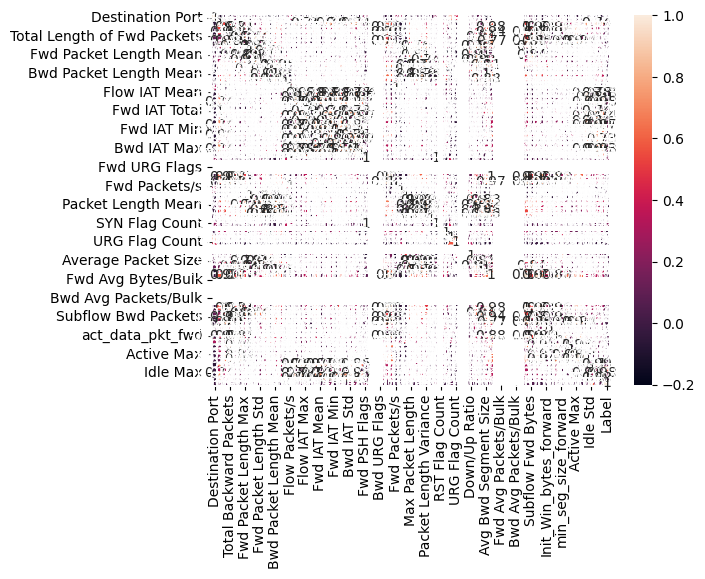

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Save the trained model to a .pkl file
joblib.dump(model, 'network_anomaly_detector.pkl')